## Introduction
Principal Component Analysis or PCA is one of the most popular techniques to reduce the dimensionality of a dataset by transforming its large set of features into a smaller one without losing much of the information. It can be useful as a tool for visualization, noise filtering, and feature extraction and engineering.

### How does the PCA work?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n, M = 2.0, B = 5.0, X_MIN = 0.0, X_MAX = 30.0):
      
      n_samples = n
      random = np.random.RandomState(1)  # RandomState Seeding

      # create random x values
      x1 = random.uniform(low=X_MIN, high=X_MAX, size=n_samples).reshape(n_samples, 1) 

      # calculate x2 values along the line
      x2 = M * x1 + B

      # add random noise
      x2 += random.normal(loc=0.0, scale=5.0, size=x2.shape).reshape(n_samples, 1)
      X = np.concatenate([np.round(x1,2), np.round(x2,2)], axis=1)
      return X 

X = generate_data(25)

# Normalize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

X.shape

(25, 2)

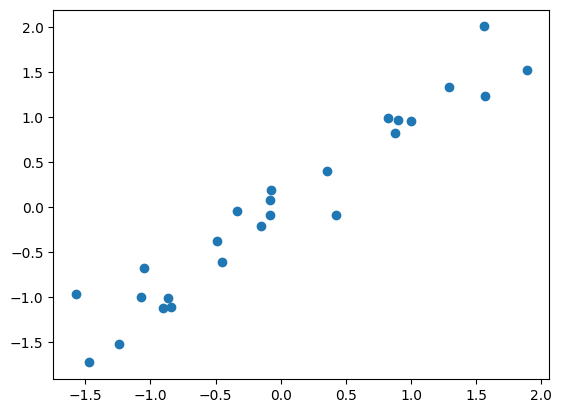

In [2]:
plt.scatter(X[:,0],X[:,1])

## Covariance Matrix

We want to reduce the number of features in the dataset while preserving most of the **information**.  
Here, *information* refers to:
- How each feature varies with itself (**variance**)
- How features vary with each other (**covariance**)

The covariance matrix of a dataset $X$ contains covariances for all possible pairs of features.  
It is denoted by **Cov** and computed as:

$$
\text{Cov} = X^T X
$$

For a 2-feature case, the covariance matrix looks like:

$$
\text{Cov} =
\begin{bmatrix}
\text{cov}(x_1, x_1) & \text{cov}(x_1, x_2) \\
\text{cov}(x_2, x_1) & \text{cov}(x_2, x_2)
\end{bmatrix}
$$

**Note:**  
The diagonal elements $\text{cov}(x_i, x_i)$ represent the **variance** of feature $x_i$.


In [3]:
cov = np.dot(X.T, X)
cov

array([[25.        , 24.12294297],
       [24.12294297, 25.        ]])

## Eigenvalues and Eigenvectors (PCA)

Once the covariance matrix is computed, the next step is to find its **eigenvalues** and **eigenvectors**.

For a covariance matrix with $d$ features:
- There are **$d$ eigenvalues** and **$d$ eigenvectors**
- Each eigenvector represents a **direction** in feature space
- Variance is maximally preserved along these directions

The amount of variance retained by an eigenvector depends on its **corresponding eigenvalue**:
- Larger eigenvalue → more variance retained
- Smaller eigenvalue → less variance retained

Let:
- $\lambda_1$ be the first eigenvalue of the covariance matrix $\text{Cov}$
- $\mathbf{v}_1$ be the corresponding eigenvector  
- $\lambda_2$ be the second eigenvalue
- $\mathbf{v}_2$ be the corresponding eigenvector

Eigenvectors associated with **larger eigenvalues** are selected first in PCA, as they preserve the most information.


In [4]:
e_values, e_vectors = np.linalg.eig(cov)

In [5]:
lambda1, lambda2 = e_values

In [6]:
v1, v2 = e_vectors[:,0], e_vectors[:,1]

Here, we observe that the eigenvector $\mathbf{v}_1$ corresponding to the eigenvalue  
$\lambda_1 = 0.87$ is:

$$
\mathbf{v}_1 =
\begin{bmatrix}
-0.707 \\
\;\;0.707
\end{bmatrix}
$$

Similarly, the eigenvector $\mathbf{v}_2$ corresponding to the eigenvalue  
$\lambda_2 = 49.122$ is:

$$
\mathbf{v}_2 =
\begin{bmatrix}
-0.707 \\
-0.707
\end{bmatrix}
$$


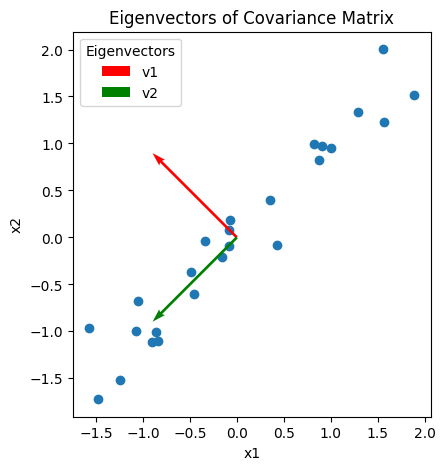

In [7]:
x = 0
y = 0
fig, ax = plt.subplots()

ax.quiver(x,y,v1[0],v1[1], angles='xy', scale=3, color='red', zorder=10)
ax.quiver(x,y,v2[0],v2[1], angles='xy', scale=3, color='green', zorder=10)
ax.legend(labels=['v1', 'v2'], title='Eigenvectors')

ax.scatter(X[:, 0], X[:, 1], zorder=2)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Eigenvectors of Covariance Matrix")

ax.set_aspect('equal')
fig.set_figheight(5)
fig.set_figwidth(5)
plt.show()

Here, we can observe that the data has **more variance** along the direction of  
$\mathbf{v}_2$ than along the direction of $\mathbf{v}_1$.

This happens because:
$$
\lambda_1 < \lambda_2
$$

which means the eigenvector $\mathbf{v}_2$ retains more variance than $\mathbf{v}_1$.

---

## Principal Components

We now have:
- The **information** (variance)
- The **directions** (eigenvectors) that retain this information

The next step is to create **new features** using these directions.

As discussed earlier:
- Eigenvectors corresponding to **larger eigenvalues** retain more variance
- Eigenvectors with **smaller eigenvalues** retain less variance

👉 When eigenvectors are **ordered in descending order of their corresponding eigenvalues**,  
the resulting vectors are called **principal components**.


In [8]:
idx = e_values.argsort()[::-1]
e_values = e_values[idx]

principle_components = e_vectors[:,idx]

In [9]:
principle_components

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [10]:
no_of_pc = principle_components.shape[1]
explained_variance = []

for i in range(no_of_pc):
    variance = (e_values[i] / sum(np.diagonal(cov)) * 100 )
    explained_variance.append(variance)

explained_variance

[np.float64(98.24588594597589), np.float64(1.754114054024121)]

As we can see, the **first principal component** accounts for the maximum variance  
(**98.25%**) in the data, whereas the **second principal component** accounts for only  
about **1.75%** of the variance.

We know that principal components are the **eigenvectors ordered in descending order of
their corresponding eigenvalues**. Therefore:

- The **first principal component** retains the maximum variance
- The **second principal component** retains less variance than the first
- This continues until the last principal component, which retains the **minimum variance**

---

### Properties of Principal Components

- For a dataset with $d$ features, there are $d$ eigenvectors and hence  
  **$d$ principal components**.  
  Since the first $k$ principal components retain the maximum variance,  
  we can select $k < d$ principal components to represent the data.

  In our case, $d = 2$, so we have **two principal components**.

- Since the covariance matrix is **symmetric**, its eigenvectors are **orthogonal**.  
  Statistically, this means that the principal components are **uncorrelated**.

- Principal components are **linear combinations of the original features**.


## Projecting the Data into the Principal Components

Apart from **standardization**, no changes have been made to the original data.  
We have only computed the **principal components**.

Now, we use these principal components to **reduce the number of features**.

---

### Forming the Projection Matrix

Let us construct a matrix containing the first $k$ principal components,  
which will be used as the new features.  
We denote this matrix by **$U$**:

$$
U =
\begin{bmatrix}
\;|\; & \;|\; &        & \;|\; \\
\mathbf{pc}_1 & \mathbf{pc}_2 & \cdots & \mathbf{pc}_k \\
\;|\; & \;|\; &        & \;|\;
\end{bmatrix}
$$

Here:
- $\mathbf{pc}_i$ denotes the $i$-th principal component
- $k < d$, where $d$ is the original number of features
- $U$ contains the directions that preserve the **maximum variance**


In [11]:
U = principle_components.T

### Projecting Data onto Principal Components

Finally, you need to find the position of the data points on the new axis *i.e.* project the data points onto the principal component. 

Let's find the new dataset with less number of features computed by projecting the original data onto the principal component and call it $\mathbf{X}_{reduced}$.

$$\mathbf{X}_{reduced} = (\mathbf{U}^{T} \mathbf{X}^{T})^{T}$$

> **Note:** This is mathematically equivalent to $\mathbf{X}_{reduced} = \mathbf{X}\mathbf{U}$, which is more commonly used in programming implementations like NumPy.

In [12]:
X_projected = np.dot(U.T, X.T).T

In [13]:
X_projected

array([[-6.54739664e-04,  1.16100560e-01],
       [-1.38092654e+00, -3.68397903e-02],
       [ 1.79067563e+00,  4.32515692e-01],
       [ 6.10835240e-01,  8.41984714e-02],
       [ 1.21884713e+00,  2.63010841e-01],
       [ 1.95191076e+00, -1.95422483e-01],
       [ 1.42767116e+00, -1.46310164e-01],
       [ 2.67174238e-01,  2.08829165e-01],
       [ 2.53116595e-01, -3.48950143e-02],
       [-5.29254717e-01,  2.97308276e-02],
       [-8.10711705e-02,  1.84723051e-01],
       [-1.20288576e+00, -3.79714803e-02],
       [ 1.37607210e+00, -1.85692922e-01],
       [-1.97811178e+00, -2.36587902e-01],
       [ 2.26033589e+00, -1.75302152e-01],
       [-1.28510367e+00,  1.20064611e-01],
       [ 1.19037046e-01, -5.27607430e-03],
       [-2.42222941e-01, -3.58391859e-01],
       [ 1.46207646e+00,  5.17936274e-02],
       [ 1.32285243e+00, -1.00461132e-01],
       [-1.85515276e+00,  3.13379362e-02],
       [-2.41001384e+00, -2.61279792e-01],
       [ 7.47140938e-01, -1.07707228e-01],
       [-1.

To better understand the projection, you will need to visualize it in the scatterplot of the original data$X$.So let's plot the original data and it's projection on the first principal component.

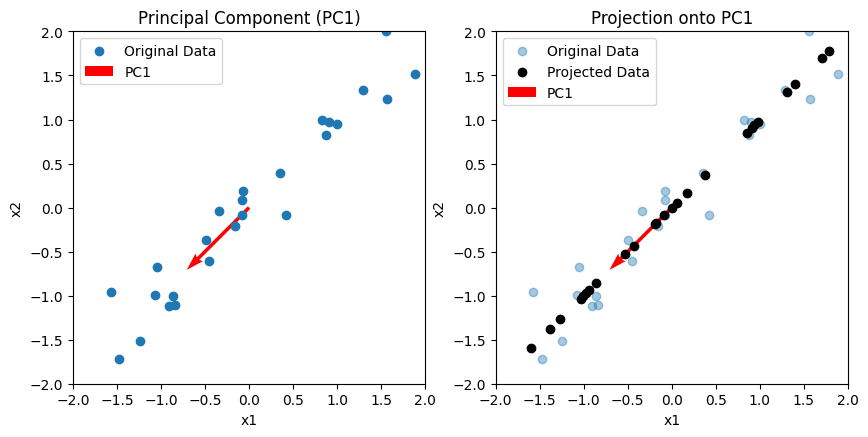

In [14]:
# -----------------------------
# Projection onto PC1
# -----------------------------
X_projected = X @ v2.reshape(-1, 1)       # (n,1)
X_inverse = X_projected @ v2.reshape(1, -1)  # back to 2D

# -----------------------------
# Plotting
# -----------------------------
x, y = 0, 0
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
 
# ---- Plot 1: Original data + PC1 direction
axs[0].scatter(X[:, 0], X[:, 1], label="Original Data", zorder=2)
axs[0].quiver(
    x, y, v2[0], v2[1],
    angles='xy', scale_units='xy', scale=1,
    color='red', width=0.01, label="PC1"
)
axs[0].set_title("Principal Component (PC1)")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
axs[0].set_xlim(-2, 2)
axs[0].set_ylim(-2, 2)
axs[0].set_aspect('equal')
axs[0].legend()
 
# ---- Plot 2: Projection onto PC1
axs[1].scatter(X[:, 0], X[:, 1], label="Original Data", alpha=0.4)
axs[1].scatter(X_inverse[:, 0], X_inverse[:, 1],
               color='black', label="Projected Data", zorder=10)
axs[1].quiver(
    x, y, v2[0], v2[1],
    angles='xy', scale_units='xy', scale=1,
    color='red', width=0.01, label="PC1"
)
axs[1].set_title("Projection onto PC1")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")
axs[1].set_xlim(-2, 2)
axs[1].set_ylim(-2, 2)
axs[1].set_aspect('equal')
axs[1].legend()
 
plt.show()


## Applications of PCA

* **Dimensionality Reduction:** PCA is predominantly used to reduce the dimension of a large dataset. As you saw earlier, PCA can effectively reduce the number of features without losing much of the information. This helps in better visualizing the data and building a model that generalizes well to new data.
* **Image Compression:** An image is a matrix of pixel values. PCA can reduce the dimensions of the matrix representing an image. PCA finds the principal components that represent the image best.
* **Noise Filtering:** PCA is also used to filter the noise present in the signal. Any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. Hence, if you take only the larger subset of the principal component with a high variance of data, then the reconstructed data or signal should be mostly actual signal.
* **Quantitative Finance:** In quantitative finance, the price of a stock is dependent on 30-500 different factors or variables. You can use PCA to find the 3-4 principal components that represent all those variables. Then you can use those principal components to analyze risk and come up with trading strategies.

---

## Limitations of PCA

* **Linear Assumption:** The principal components found by PCA are the linear combination of the existing features. As a result, they are simply some straight lines. These straight lines can represent only those data whose features are **linearly correlated**. However, if the features are not linearly correlated, the principal components cannot represent the data well.

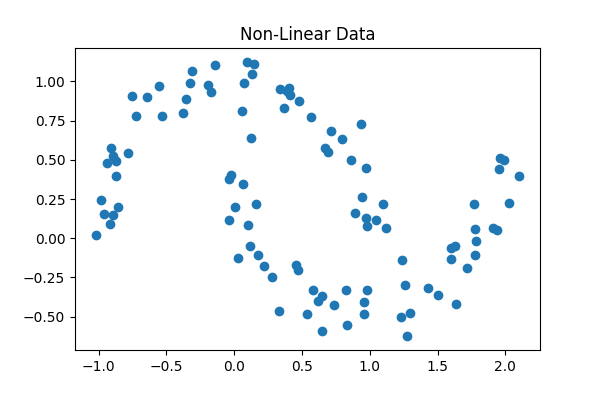

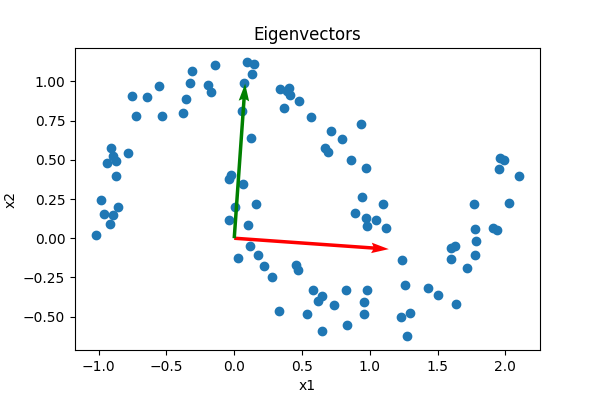

Figure: PCA on non-linear data

In [15]:
# Sklern Implementation

from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=999)


In [16]:
X_red = pca.fit_transform(X)

In [17]:
pca.explained_variance_ratio_

array([0.98245886])

In [18]:
pca.components_

array([[0.70710678, 0.70710678]])